In [2]:
def inverse_prob(arr):
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            arr[i,j] = (255-arr[i,j])/255
    return arr

def inverse_norm(arr):
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            arr[i,j] = (255-arr[i,j])
    return arr

import numpy as np

def leaky_relu(x):
    return np.maximum(0.01 * x, x)


In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def convert_image_to_grayscale(image_path,l,w):
    # Load the image using Pillow
    img = Image.open(image_path)
    
    # Convert the image to grayscale
    grayscale_img = img.convert('L')
    
    # Compress the image (optional, you can skip this step)
    # The new image size is (width/2, height/2) to reduce memory usage
    compressed_img = grayscale_img.resize((l, w))
                                            ###   OR  ###
    '''
      # Resize the image to the required dimensions
      resized_img = img.resize((new_width, new_height))
    
      # Save the resized image to a new file (optional)
      resized_image.save('resized_image.jpg')

    '''
    display(compressed_img)
    # Convert the compressed image to a NumPy array
    pixel_array = np.array(compressed_img)
    
    return inverse_norm(pixel_array)

# Example usage
image_path_A = "A.png"
image_path_B = "B.png"
image_path_C = "C.png"
image_path_D = "D.png"
le=28
wi=28
A = convert_image_to_grayscale(image_path_A,le,wi)
B = convert_image_to_grayscale(image_path_B,le,wi)
C = convert_image_to_grayscale(image_path_C,le,wi)
D = convert_image_to_grayscale(image_path_D,le,wi)
# Display the compressed image using matplotlib
#plt.imshow(B, cmap='gray')
#plt.axis('on')  # Turn off axis
#plt.show()

A.shape=(1,int(le*wi))
print(A)
#print(A.shape)
data_list=[B,C,D]

for i in data_list:
    i.shape=(1,int(le*wi))
    A=np.append(A,i,axis=0)
print(A.shape)


labels=np.array(['A','B','C','D'])
labels.shape=(4,1)
#print(labels)
#print(A)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  46  88  87  87  87  88  35   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 198 255 255
  255 255 255 170   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  54 251 255 255 255 255 255 239  30   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 146 255
  255 255 255 255 255 255 113   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  18 228 255 255 250 225 255 255 255 199   4
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  92
  255 255 255 230 151 255 255 255 252 

In [9]:
import pandas as pd
X = pd.DataFrame(data=A)
y = pd.DataFrame(data=labels).astype("category")
print(X)
print(y)
#df[str_obj_col].astype("category")

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777   
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0  \
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  

[4 rows x 784 columns]
   0
0  A
1  B
2  C
3  D


In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
ann = MLPClassifier(max_iter=5000,verbose=1,
                    n_iter_no_change=5000,
                    activation='relu')
ann.fit(X,['A','B','C','D'])

Iteration 1, loss = 18.02415043
Iteration 2, loss = 18.02412921
Iteration 3, loss = 9.01319561
Iteration 4, loss = 0.00220984
Iteration 5, loss = 0.00217344
Iteration 6, loss = 6.46238570
Iteration 7, loss = 0.00210192
Iteration 8, loss = 0.00206702
Iteration 9, loss = 0.00203277
Iteration 10, loss = 0.03274989
Iteration 11, loss = 0.00196793
Iteration 12, loss = 0.00193737
Iteration 13, loss = 0.00190756
Iteration 14, loss = 0.00187850
Iteration 15, loss = 0.00185021
Iteration 16, loss = 0.00182268
Iteration 17, loss = 0.00179592
Iteration 18, loss = 0.00176992
Iteration 19, loss = 0.00174469
Iteration 20, loss = 0.00172021
Iteration 21, loss = 0.00169648
Iteration 22, loss = 0.00167349
Iteration 23, loss = 0.00165123
Iteration 24, loss = 0.00162969
Iteration 25, loss = 0.00160885
Iteration 26, loss = 0.00158871
Iteration 27, loss = 0.00156925
Iteration 28, loss = 0.00155046
Iteration 29, loss = 0.00153232
Iteration 30, loss = 0.00151483
Iteration 31, loss = 0.00149795
Iteration 32, l

c:\Users\patap\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=5000, n_iter_no_change=5000, verbose=1)

In [12]:
print(A[1])
p=A[2]
p.shape=(1,len(p))
ann.predict(p)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77 194 194
 194 194 194 194 194 194 194 194 194 192 185 160 123  78  29   0   0   0
   0   0   0   0   0   0   0 106 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 238 170  60   0   0   0   0   0   0   0   0 103
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 249 122   0   0   0   0   0   0   0 103 255 255 255 255 255 252 207 199
 199 199 211 239 255 255 255 255 255 255 255 255  86   0   0   0   0   0
   0 103 255 255 255 255 255 241  34   0   0   0   6  28  91 221 255 255
 255 255 255 255 184   1   0   0   0   0   0 103 255 255 255 255 255 241
  35   0   0   0   0   0   0  59 246 255 255 255 25

array(['C'], dtype='<U1')

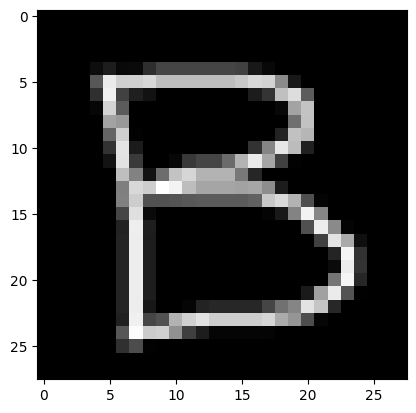

Predicted letter: ['B']


array([[3.82428805e-89, 1.00000000e+00, 1.16776820e-62, 4.95246464e-19]])

In [13]:
###############      PREDICT A,B,C,D     #############
image_path_A_test = "B_test(1).png"
A_test = convert_image_to_grayscale(image_path_A_test,le,wi)


plt.imshow(A_test, cmap='gray')
plt.axis('on')  # Turn off axis
plt.show()
A_test.shape=(1,int(le*wi))

#print(A_test)


print("Predicted letter:",ann.predict(A_test))
ann.predict_proba(A_test)